In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=22197823)

# q1.a)

Data 1: mean : 1.29, std: 0.15. Expected mean and std: 1.5, 0.2
Data 2: mean : 1.91, std: 0.15. Expected mean and std: 2.0, 0.2
T statistic: -6.92, p-value: 0.0000160548


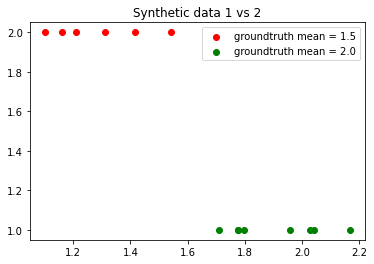

In [8]:
# generate sample data
std_gt = 0.2
mean_1_gt = 1.5
mean_2_gt = 2.0
N_1 = 6
N_2 = 8

group1 = rng.normal(loc=mean_1_gt, scale=std_gt, size=N_1)
group2 = rng.normal(loc=mean_2_gt, scale=std_gt, size=N_2)

mean_1_calc = group1.mean()
mean_2_calc = group2.mean()
std_1_calc = group1.std()
std_2_calc = group2.std()

print(f'Data 1: mean : {mean_1_calc:.02f}, std: {std_1_calc:.02f}. Expected mean and std: {mean_1_gt}, {std_gt}')
print(f'Data 2: mean : {mean_2_calc:.02f}, std: {std_2_calc:.02f}. Expected mean and std: {mean_2_gt}, {std_gt}')

plt.scatter(group1, 2 * np.ones(N_1), color='r', label=f'groundtruth mean = {mean_1_gt}')
plt.scatter(group2, 1 * np.ones(N_2), color='g', label=f'groundtruth mean = {mean_2_gt}')
plt.legend()
plt.title('Synthetic data 1 vs 2')

t_statistic_gt, p_val = stats.ttest_ind(group1, group2)
print(f'T statistic: {t_statistic_gt:.2f}, p-value: {p_val:.10f}')